In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('c:\\Users\\ddesa\\OneDrive\\Documents\\Dimitri\\scolarité\\ENSTA-MPRO\\projet\\Projet-MPRO\\results\\solutions_validees')


# function to calculate cumulative count of resolved instances
def calculate_cumulative_count(df):
    # Filter instances where gap <= 0.01
    resolved_instances = df[df['gap'] <= 0.01]
    # Sort by comput time
    resolved_instances = resolved_instances.sort_values(by='comput time')
    # Calculate cumulative count of resolved instances
    resolved_instances['cumulative_count'] = range(1, len(resolved_instances) + 1)
    return resolved_instances[['comput time', 'cumulative_count']]

# Fonction pour séparer les instances euclidiennes et non-euclidiennes
def sep_instances_euclidiennes(df):
    instances_eucl = df.loc[df["file"].str.contains("true")]
    instances_n_eucl = df.loc[df["file"].str.contains("false")]
    return instances_eucl, instances_n_eucl

# Fonction pour extraire l'entier suivant 'n_' dans une chaîne
def extract_integer_after_n(df):
    # Utiliser une expression régulière pour trouver 'n_' suivi de chiffres
    df["size instance"] = df["file"].str.extract(r'n_(\d+)').astype(int)

def create_bound(df):
    df['borne_inf'] = df['val']/(1+df['gap']/100)

def calcul_best_gap(df1, df2):
    merged_df = pd.merge(df1, df2, left_on='n', right_on='size instance')
    df1['gap'] = (merged_df['hybrid_rc']-merged_df['borne_inf_y'])/merged_df['borne_inf_y']*100

In [42]:
# Load the files and convert them into DataFrames
# Re-read the files with the correct column names
columns_dual = ["file", "comput time", "limit time", "val", "gap"]
columns_bnc_pc = ["file", "comput time", "limit time", "val", "gap", "time slave/total time(%)"]

# Load the files into DataFrames with specified columns
df_dual = pd.read_csv('resultats_dual2_600s.txt', delimiter='\t', names=columns_dual, skiprows=2)
df_bnc = pd.read_csv('resultats_bnc_fast_600s.txt', delimiter='\t', names=columns_bnc_pc, skiprows=2)
df_pc = pd.read_csv('resultats_pc_fast_600s.txt', delimiter='\t', names=columns_bnc_pc, skiprows=2)
df_dual_n_eucl_ws = pd.read_csv('resultats_dual_ws_600s_eucl-false.txt', delimiter='\t', names=columns_dual, skiprows=2)
df_dual_eucl_ws = pd.read_csv('resultats_dual_ws_600s_eucl-true.txt', delimiter='\t', names=columns_dual, skiprows=2)
df_dual_ws2 = pd.read_csv('resultats_dual_ws_600s.txt',delimiter='\t', names=columns_dual, skiprows=2)

# on regroupe celles du warm start
df_dual_ws_eucl, _ = sep_instances_euclidiennes(df_dual_eucl_ws)
_, df_dual_ws_n_eucl = sep_instances_euclidiennes(df_dual_n_eucl_ws)

df_dual_ws = pd.concat([df_dual_ws_eucl, df_dual_ws_n_eucl], axis=0)

create_bound(df_dual)
create_bound(df_bnc)
create_bound(df_pc)
create_bound(df_dual_ws)
create_bound(df_dual_ws2)


df_dual_eucl, df_dual_n_eucl = sep_instances_euclidiennes(df_dual)
df_dual_ws2_eucl, df_dual_ws2_n_eucl = sep_instances_euclidiennes(df_dual_ws2)
df_bnc_eucl, df_bnc_n_eucl = sep_instances_euclidiennes(df_bnc)
df_pc_eucl, df_pc_n_eucl = sep_instances_euclidiennes(df_pc)

# traitement des données des heuristiques
df_heur_eucl = pd.read_csv('../../results_heuristiques/value_heuristic_true.csv')
df_heur_n_eucl = pd.read_csv('../../results_heuristiques/value_heuristic_false.csv')
df_heur_eucl = df_heur_eucl.drop(columns = ['CW','LK','2opt','3opt','hybrid_mc'])
df_heur_n_eucl = df_heur_n_eucl.drop(columns = ['CW','LK','2opt','3opt','hybrid_mc'])

df_time_heur_eucl = pd.read_csv('../../results_heuristiques/time_heuristic_true.csv')
df_time_heur_n_eucl = pd.read_csv('../../results_heuristiques/time_heuristic_false.csv')
df_time_heur_eucl = df_time_heur_eucl.drop(columns = ['CW','LK','2opt','3opt','hybrid_mc'])
df_time_heur_n_eucl = df_time_heur_n_eucl.drop(columns = ['CW','LK','2opt','3opt','hybrid_mc'])
df_time_heur_eucl = df_time_heur_eucl.rename(columns={'hybrid_rc': 'comput time'})
df_time_heur_n_eucl = df_time_heur_n_eucl.rename(columns={'hybrid_rc': 'comput time'})

df_heur_eucl = pd.merge(df_heur_eucl, df_time_heur_eucl, left_on='n', right_on='n')
df_heur_n_eucl = pd.merge(df_heur_n_eucl, df_time_heur_n_eucl, left_on='n', right_on='n')

df_heur_eucl['real_gap'] = (df_heur_eucl['hybrid_rc']-df_heur_eucl['borne_inf'])/df_heur_eucl['borne_inf']*100
df_heur_n_eucl['real_gap'] = (df_heur_n_eucl['hybrid_rc']-df_heur_n_eucl['borne_inf'])/df_heur_n_eucl['borne_inf']*100


extract_integer_after_n(df_dual_eucl)
extract_integer_after_n(df_dual_n_eucl)
extract_integer_after_n(df_bnc_eucl)
extract_integer_after_n(df_bnc_n_eucl)
extract_integer_after_n(df_pc_eucl)
extract_integer_after_n(df_pc_n_eucl)
extract_integer_after_n(df_dual_ws_eucl)
extract_integer_after_n(df_dual_ws_n_eucl)
extract_integer_after_n(df_dual_ws2_eucl)
extract_integer_after_n(df_dual_ws2_n_eucl)

df_dual_eucl = df_dual_eucl.sort_values(by = "size instance")
df_dual_n_eucl = df_dual_n_eucl.sort_values(by = "size instance")
df_bnc_eucl = df_bnc_eucl.sort_values(by = "size instance")
df_bnc_n_eucl = df_bnc_n_eucl.sort_values(by = "size instance")
df_pc_eucl = df_pc_eucl.sort_values(by = "size instance")
df_pc_n_eucl = df_pc_n_eucl.sort_values(by = "size instance")
df_dual_ws_eucl = df_dual_ws_eucl.sort_values(by = "size instance")
df_dual_ws_n_eucl = df_dual_ws_n_eucl.sort_values(by = "size instance")
df_dual_ws2_eucl = df_dual_ws2_eucl.sort_values(by = "size instance")
df_dual_ws2_n_eucl = df_dual_ws2_n_eucl.sort_values(by = "size instance")

calcul_best_gap(df_heur_eucl, df_dual_eucl[1:])
calcul_best_gap(df_heur_n_eucl, df_dual_n_eucl[1:])

df_heur = pd.concat([df_heur_eucl, df_heur_n_eucl], axis=0)

# Calculate cumulative resolved instances count for each DataFrame
cumulative_count_dual = calculate_cumulative_count(df_dual)
cumulative_count_bnc = calculate_cumulative_count(df_bnc)
cumulative_count_pc = calculate_cumulative_count(df_pc)
cumulative_count_dual_ws = calculate_cumulative_count(df_dual_ws)
cumulative_count_heur = calculate_cumulative_count(df_heur)
cumulative_count_dual_ws2 = calculate_cumulative_count(df_dual_ws2)


C:\Users\ddesa\AppData\Local\Temp\ipykernel_2728\1931233265.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size instance"] = df["file"].str.extract(r'n_(\d+)').astype(int)
C:\Users\ddesa\AppData\Local\Temp\ipykernel_2728\1931233265.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size instance"] = df["file"].str.extract(r'n_(\d+)').astype(int)
C:\Users\ddesa\AppData\Local\Temp\ipykernel_2728\1931233265.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

### Diagramme de performance

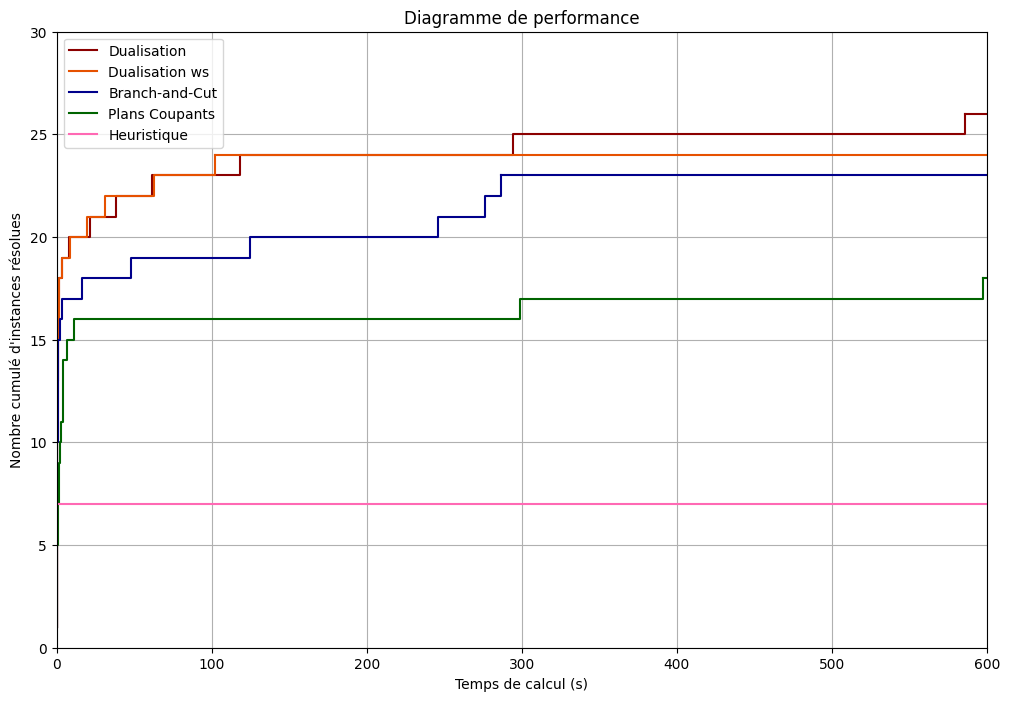

In [43]:
# Plotting the step plots with linear completion for each DataFrame
plt.figure(figsize=(12, 8))

# Plot for dual with linear completion
plt.plot(cumulative_count_dual['comput time'], cumulative_count_dual['cumulative_count'], label='Dualisation', color='#8b0000', drawstyle='steps-post')
plt.plot([cumulative_count_dual['comput time'].iloc[-1], 600], [cumulative_count_dual['cumulative_count'].iloc[-1], cumulative_count_dual['cumulative_count'].iloc[-1]], color='#8b0000')

# Plot for dual ws with linear completion
plt.plot(cumulative_count_dual_ws['comput time'], cumulative_count_dual_ws['cumulative_count'], label='Dualisation ws', color='#e65100', drawstyle='steps-post')
plt.plot([cumulative_count_dual_ws['comput time'].iloc[-1], 600], [cumulative_count_dual_ws['cumulative_count'].iloc[-1], cumulative_count_dual_ws['cumulative_count'].iloc[-1]], color='#e65100')

# Plot for bnc with linear completion
plt.plot(cumulative_count_bnc['comput time'], cumulative_count_bnc['cumulative_count'], label='Branch-and-Cut', color='#00008b', drawstyle='steps-post')
plt.plot([cumulative_count_bnc['comput time'].iloc[-1], 600], [cumulative_count_bnc['cumulative_count'].iloc[-1], cumulative_count_bnc['cumulative_count'].iloc[-1]], color='#00008b')

# Plot for pc with linear completion
plt.plot(cumulative_count_pc['comput time'], cumulative_count_pc['cumulative_count'], label='Plans Coupants', color='#006400', drawstyle='steps-post')
plt.plot([cumulative_count_pc['comput time'].iloc[-1], 600], [cumulative_count_pc['cumulative_count'].iloc[-1], cumulative_count_pc['cumulative_count'].iloc[-1]], color='#006400')

# Plot for dual with linear completion
plt.plot(cumulative_count_heur['comput time'], cumulative_count_heur['cumulative_count'], label='Heuristique', color='#ff69b4', drawstyle='steps-post')
plt.plot([cumulative_count_heur['comput time'].iloc[-1], 600], [cumulative_count_heur['cumulative_count'].iloc[-1], cumulative_count_heur['cumulative_count'].iloc[-1]], color='#ff69b4')

# Setting the plot details
plt.xlabel('Temps de calcul (s)')
plt.ylabel('Nombre cumulé d\'instances résolues')
plt.title('Diagramme de performance')
plt.legend()
plt.grid(True)
plt.xlim(0, 600)
plt.ylim(0, 30)

# Show plot
plt.show()

### Comparaison euclidiennes-non euclidiennes 

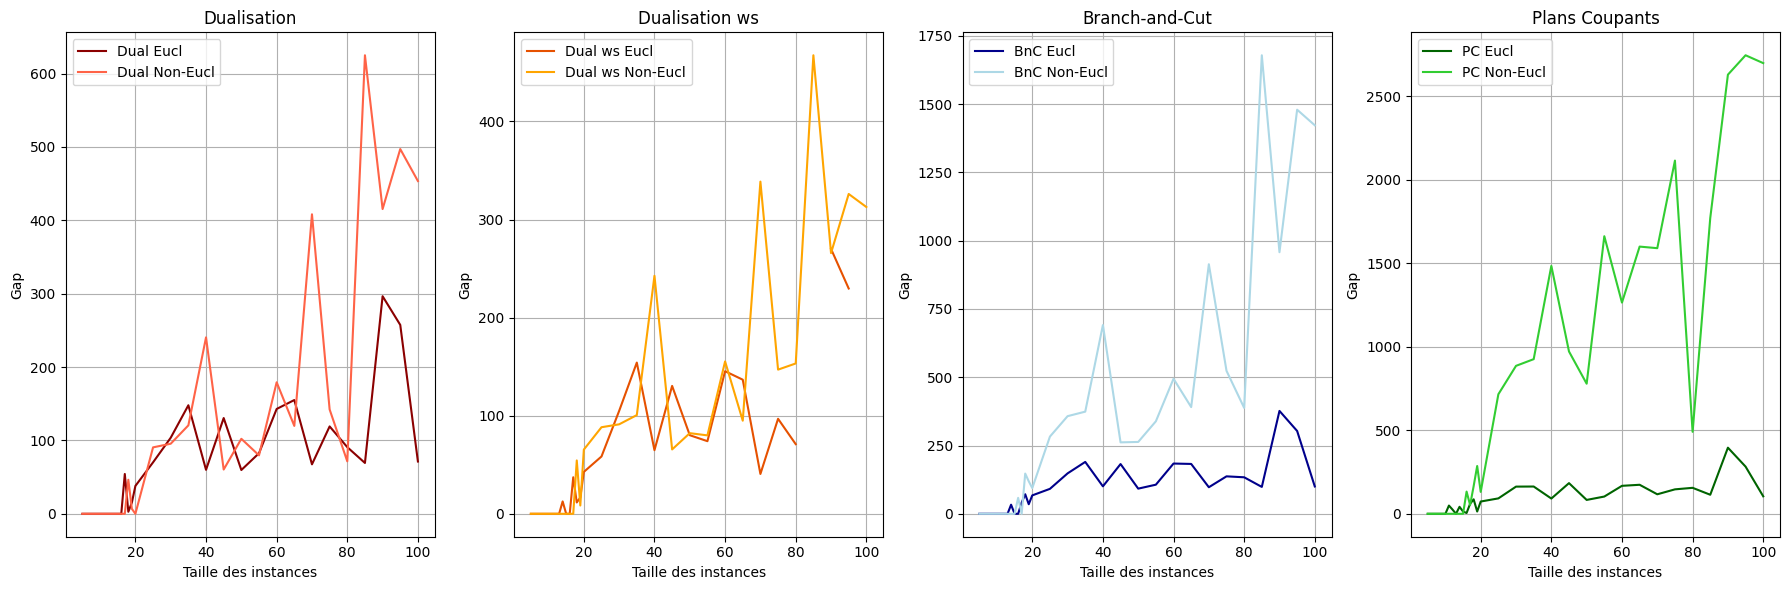

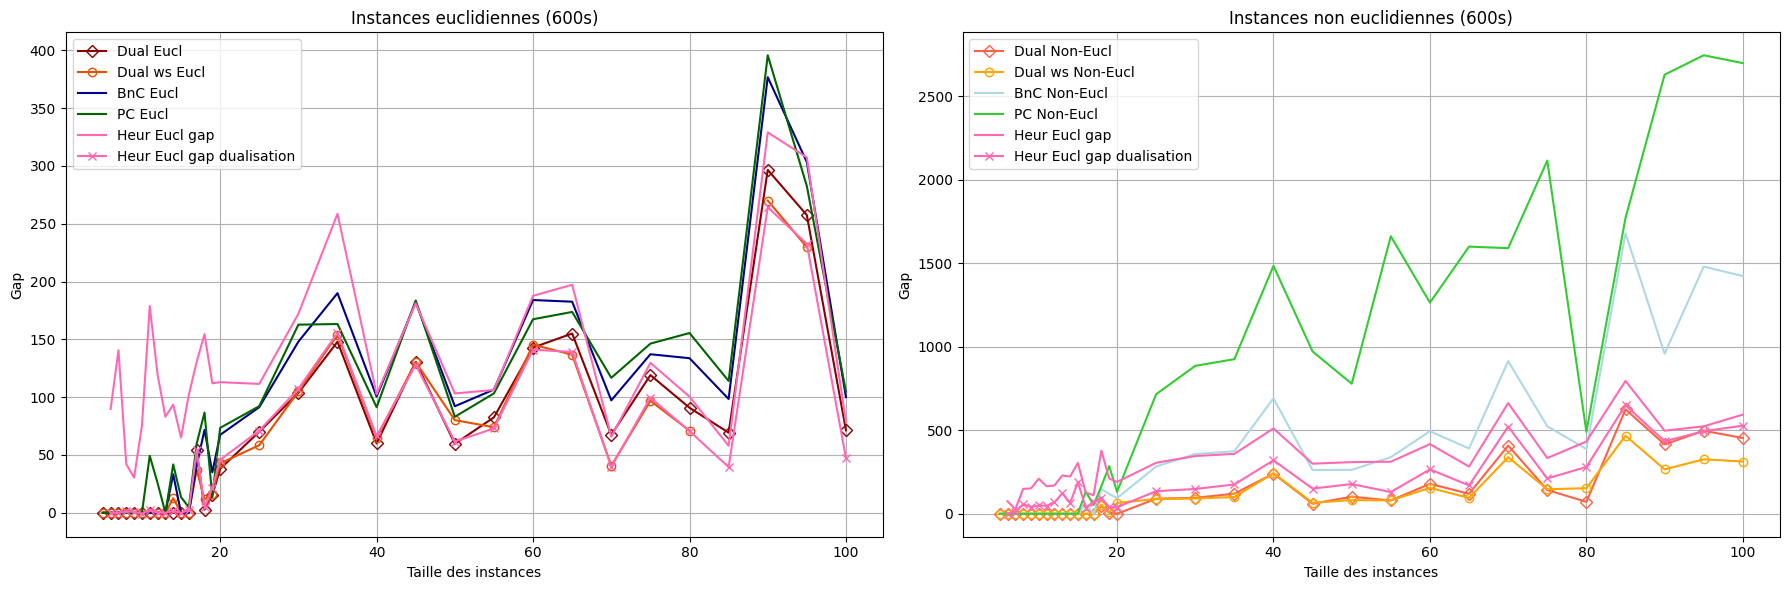

In [44]:
# Créer une figure avec quatre sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

# Tracer le graphique pour Dual
axes[0].plot(df_dual_eucl['size instance'], df_dual_eucl['gap'], label='Dual Eucl', color='#8b0000')
axes[0].plot(df_dual_n_eucl['size instance'], df_dual_n_eucl['gap'], label='Dual Non-Eucl', color='#ff6347')
axes[0].set_title('Dualisation')
axes[0].set_xlabel('Taille des instances')
axes[0].set_ylabel('Gap')
axes[0].legend()
axes[0].grid(True)

# Tracer le graphique pour Dual ws
axes[1].plot(df_dual_ws_eucl['size instance'], df_dual_ws_eucl['gap'], label='Dual ws Eucl', color='#e65100')
axes[1].plot(df_dual_ws_n_eucl['size instance'], df_dual_ws_n_eucl['gap'], label='Dual ws Non-Eucl', color='#ffa500')
axes[1].set_title('Dualisation ws')
axes[1].set_xlabel('Taille des instances')
axes[1].set_ylabel('Gap')
axes[1].legend()
axes[1].grid(True)

# Tracer le graphique pour BnC
axes[2].plot(df_bnc_eucl['size instance'], df_bnc_eucl['gap'], label='BnC Eucl', color='#00008b')
axes[2].plot(df_bnc_n_eucl['size instance'], df_bnc_n_eucl['gap'], label='BnC Non-Eucl', color='#add8e6')
axes[2].set_title('Branch-and-Cut')
axes[2].set_xlabel('Taille des instances')
axes[2].set_ylabel('Gap')
axes[2].legend()
axes[2].grid(True)

# Tracer le graphique pour PC
axes[3].plot(df_pc_eucl['size instance'], df_pc_eucl['gap'], label='PC Eucl', color= '#006400')
axes[3].plot(df_pc_n_eucl['size instance'], df_pc_n_eucl['gap'], label='PC Non-Eucl', color='#32cd32')
axes[3].set_title('Plans Coupants')
axes[3].set_xlabel('Taille des instances')
axes[3].set_ylabel('Gap')
axes[3].legend()
axes[3].grid(True)

# Ajuster la disposition
plt.tight_layout()

# Afficher les graphiques
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))


axes[0].plot(df_dual_eucl['size instance'], df_dual_eucl['gap'], label='Dual Eucl', color='#8b0000', marker ='D',  markerfacecolor='none')
axes[0].plot(df_dual_ws_eucl['size instance'], df_dual_ws_eucl['gap'], label='Dual ws Eucl', color='#e65100', marker ='o',  markerfacecolor='none')
axes[0].plot(df_bnc_eucl['size instance'], df_bnc_eucl['gap'], label='BnC Eucl', color='#00008b')
axes[0].plot(df_pc_eucl['size instance'], df_pc_eucl['gap'], label='PC Eucl', color= '#006400')
axes[0].plot(df_heur_eucl['n'], df_heur_eucl['real_gap'], label='Heur Eucl gap', color= '#ff69b4')
axes[0].plot(df_heur_eucl['n'], df_heur_eucl['gap'], label='Heur Eucl gap dualisation', color= '#ff69b4', marker = 'x')
axes[0].set_title('Instances euclidiennes (600s)')
axes[0].set_xlabel('Taille des instances')
axes[0].set_ylabel('Gap')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(df_dual_n_eucl['size instance'], df_dual_n_eucl['gap'], label='Dual Non-Eucl', color='#ff6347', marker ='D',  markerfacecolor='none')
axes[1].plot(df_dual_ws_n_eucl['size instance'], df_dual_ws_n_eucl['gap'], label='Dual ws Non-Eucl', color='#ffa500',marker ='o',  markerfacecolor='none')
axes[1].plot(df_bnc_n_eucl['size instance'], df_bnc_n_eucl['gap'], label='BnC Non-Eucl', color='#add8e6')
axes[1].plot(df_pc_n_eucl['size instance'], df_pc_n_eucl['gap'], label='PC Non-Eucl', color='#32cd32')
axes[1].plot(df_heur_n_eucl['n'], df_heur_n_eucl['real_gap'], label='Heur Eucl gap', color= '#ff69b4')
axes[1].plot(df_heur_n_eucl['n'], df_heur_n_eucl['gap'], label='Heur Eucl gap dualisation', color= '#ff69b4', marker = 'x')
axes[1].set_title('Instances non euclidiennes (600s)')
axes[1].set_xlabel('Taille des instances')
axes[1].set_ylabel('Gap')
axes[1].legend()
axes[1].grid(True)

# Ajuster la disposition
plt.tight_layout()

# Afficher les graphiques
plt.show()


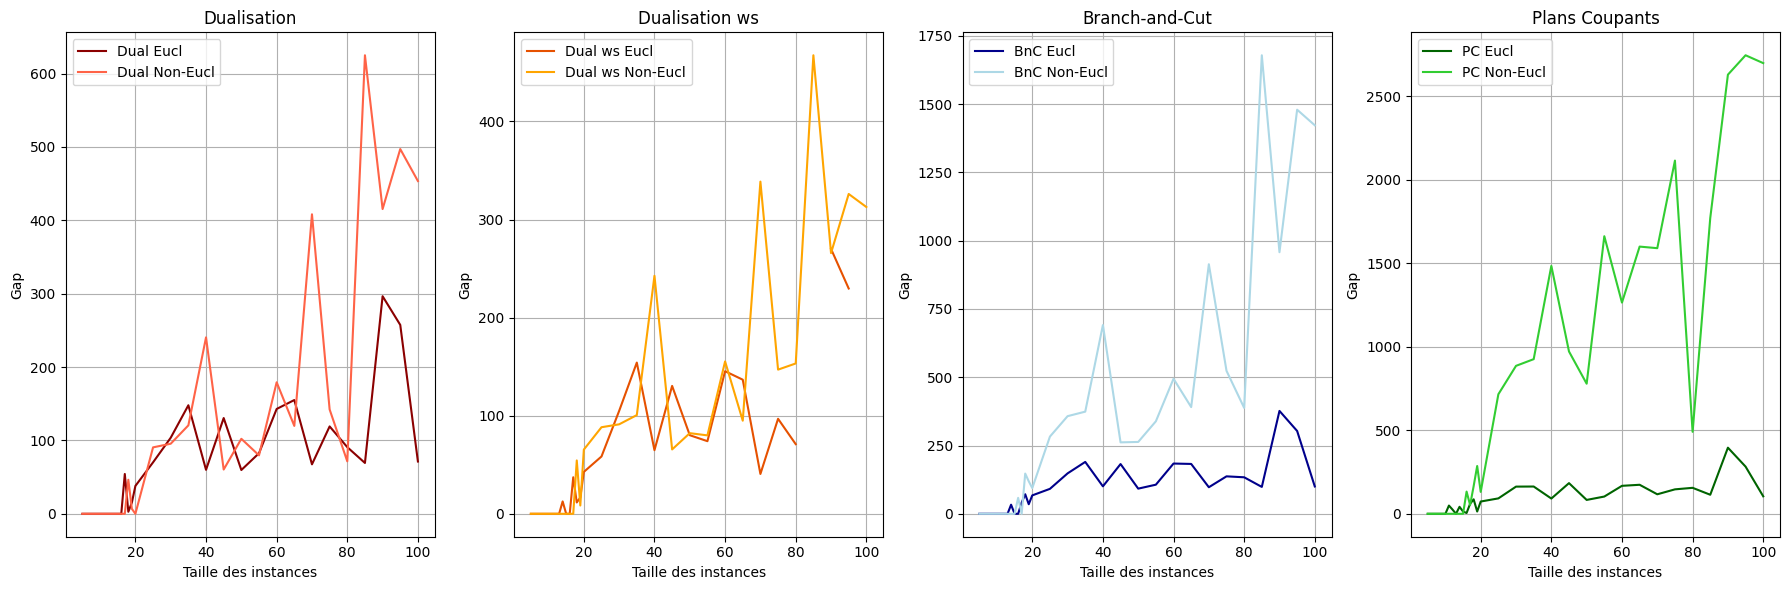

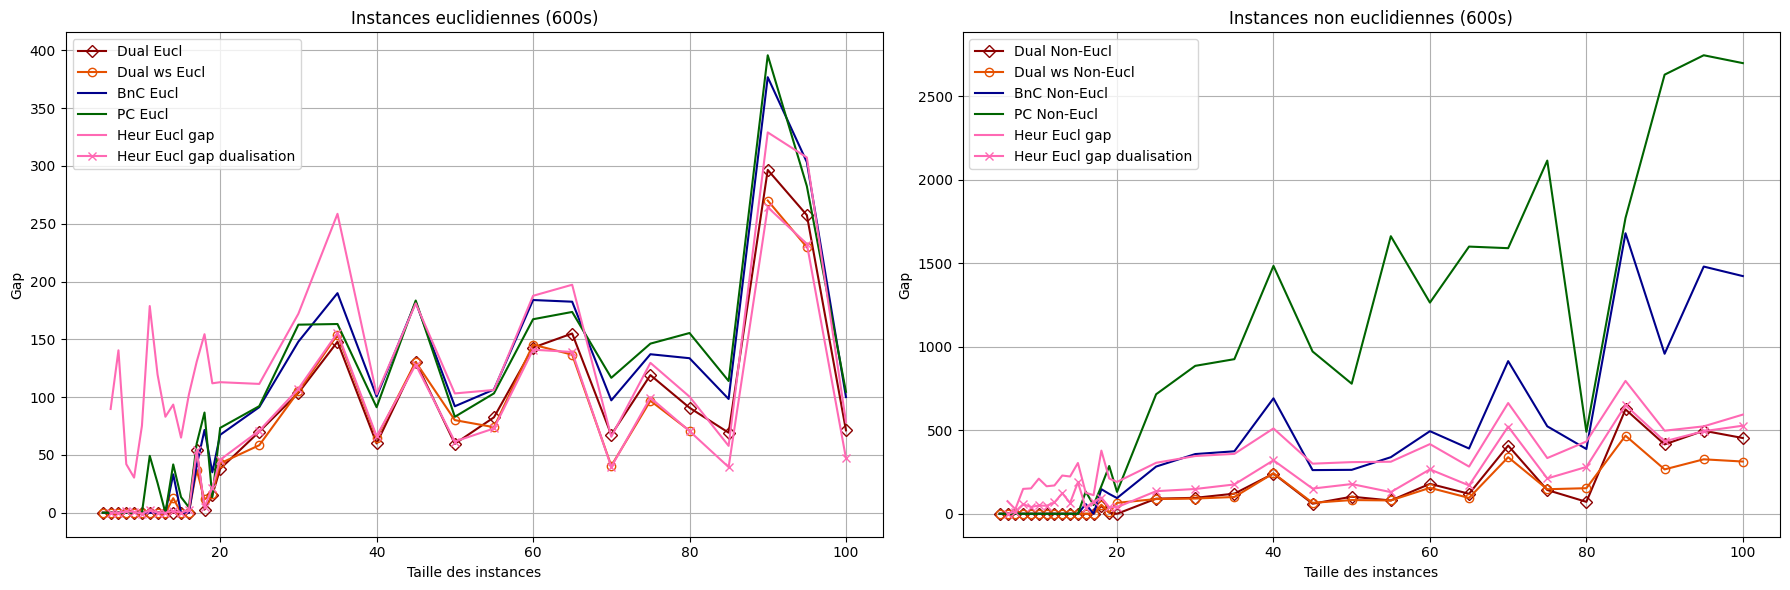

In [45]:
# Créer une figure avec quatre sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

# Tracer le graphique pour Dual
axes[0].plot(df_dual_eucl['size instance'], df_dual_eucl['gap'], label='Dual Eucl', color='#8b0000')
axes[0].plot(df_dual_n_eucl['size instance'], df_dual_n_eucl['gap'], label='Dual Non-Eucl', color='#ff6347')
axes[0].set_title('Dualisation')
axes[0].set_xlabel('Taille des instances')
axes[0].set_ylabel('Gap')
axes[0].legend()
axes[0].grid(True)

# Tracer le graphique pour Dual ws
axes[1].plot(df_dual_ws_eucl['size instance'], df_dual_ws_eucl['gap'], label='Dual ws Eucl', color='#e65100')
axes[1].plot(df_dual_ws_n_eucl['size instance'], df_dual_ws_n_eucl['gap'], label='Dual ws Non-Eucl', color='#ffa500')
axes[1].set_title('Dualisation ws')
axes[1].set_xlabel('Taille des instances')
axes[1].set_ylabel('Gap')
axes[1].legend()
axes[1].grid(True)

# Tracer le graphique pour BnC
axes[2].plot(df_bnc_eucl['size instance'], df_bnc_eucl['gap'], label='BnC Eucl', color='#00008b')
axes[2].plot(df_bnc_n_eucl['size instance'], df_bnc_n_eucl['gap'], label='BnC Non-Eucl', color='#add8e6')
axes[2].set_title('Branch-and-Cut')
axes[2].set_xlabel('Taille des instances')
axes[2].set_ylabel('Gap')
axes[2].legend()
axes[2].grid(True)

# Tracer le graphique pour PC
axes[3].plot(df_pc_eucl['size instance'], df_pc_eucl['gap'], label='PC Eucl', color= '#006400')
axes[3].plot(df_pc_n_eucl['size instance'], df_pc_n_eucl['gap'], label='PC Non-Eucl', color='#32cd32')
axes[3].set_title('Plans Coupants')
axes[3].set_xlabel('Taille des instances')
axes[3].set_ylabel('Gap')
axes[3].legend()
axes[3].grid(True)

# Ajuster la disposition
plt.tight_layout()

# Afficher les graphiques
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))


axes[0].plot(df_dual_eucl['size instance'], df_dual_eucl['gap'], label='Dual Eucl', color='#8b0000', marker ='D',  markerfacecolor='none')
axes[0].plot(df_dual_ws_eucl['size instance'], df_dual_ws_eucl['gap'], label='Dual ws Eucl', color='#e65100', marker ='o',  markerfacecolor='none')
axes[0].plot(df_bnc_eucl['size instance'], df_bnc_eucl['gap'], label='BnC Eucl', color='#00008b')
axes[0].plot(df_pc_eucl['size instance'], df_pc_eucl['gap'], label='PC Eucl', color= '#006400')
axes[0].plot(df_heur_eucl['n'], df_heur_eucl['real_gap'], label='Heur Eucl gap', color= '#ff69b4')
axes[0].plot(df_heur_eucl['n'], df_heur_eucl['gap'], label='Heur Eucl gap dualisation', color= '#ff69b4', marker = 'x')
axes[0].set_title('Instances euclidiennes (600s)')
axes[0].set_xlabel('Taille des instances')
axes[0].set_ylabel('Gap')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(df_dual_n_eucl['size instance'], df_dual_n_eucl['gap'], label='Dual Non-Eucl', color='#8b0000', marker ='D',  markerfacecolor='none')
axes[1].plot(df_dual_ws_n_eucl['size instance'], df_dual_ws_n_eucl['gap'], label='Dual ws Non-Eucl', color='#e65100',marker ='o',  markerfacecolor='none')
axes[1].plot(df_bnc_n_eucl['size instance'], df_bnc_n_eucl['gap'], label='BnC Non-Eucl', color='#00008b')
axes[1].plot(df_pc_n_eucl['size instance'], df_pc_n_eucl['gap'], label='PC Non-Eucl', color='#006400')
axes[1].plot(df_heur_n_eucl['n'], df_heur_n_eucl['real_gap'], label='Heur Eucl gap', color= '#ff69b4')
axes[1].plot(df_heur_n_eucl['n'], df_heur_n_eucl['gap'], label='Heur Eucl gap dualisation', color= '#ff69b4', marker = 'x')
axes[1].set_title('Instances non euclidiennes (600s)')
axes[1].set_xlabel('Taille des instances')
axes[1].set_ylabel('Gap')
axes[1].legend()
axes[1].grid(True)

# Ajuster la disposition
plt.tight_layout()

# Afficher les graphiques
plt.show()

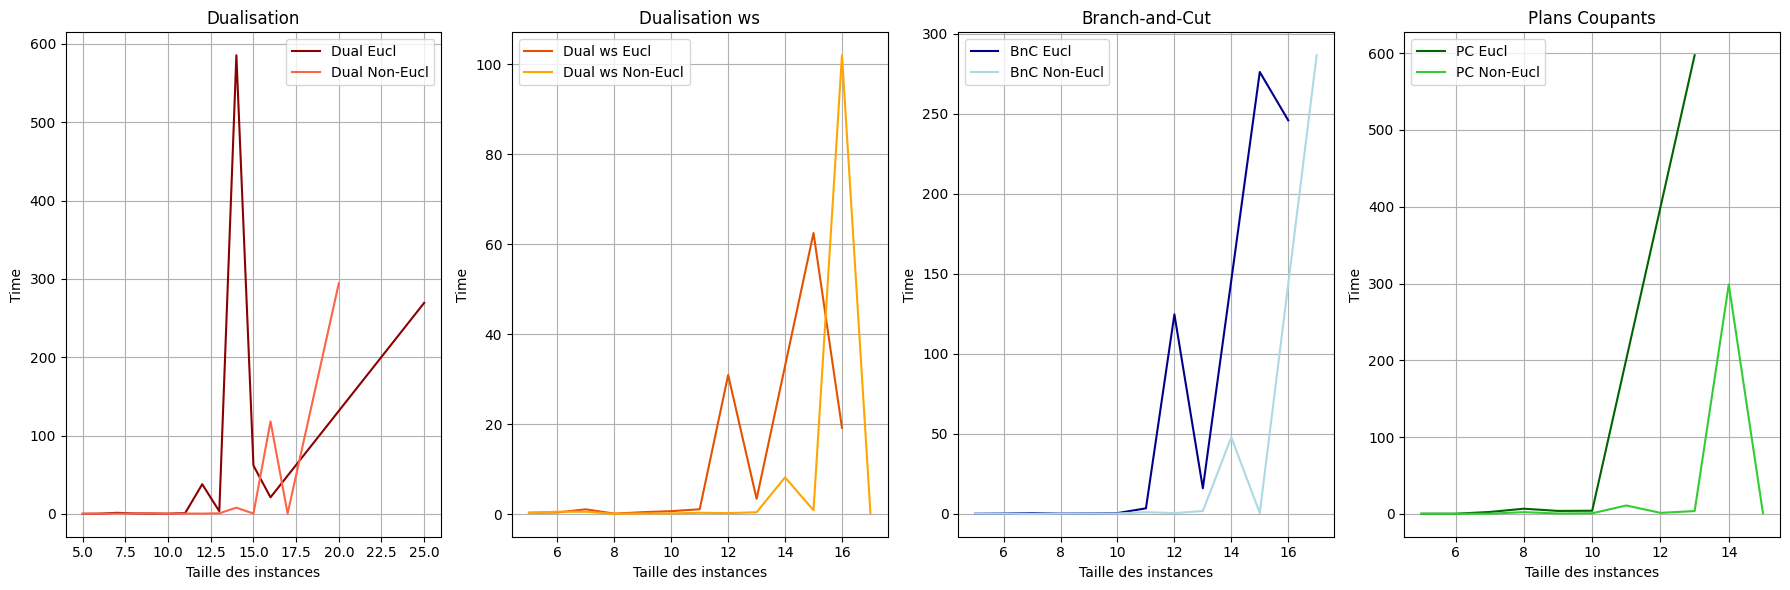

In [46]:
import matplotlib.pyplot as plt

# Supposons que les DataFrames soient déjà définis avec les colonnes 'size instance' et 'gap'

# Créer une figure avec quatre sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

# Tracer le graphique pour Dual
axes[0].plot(df_dual_eucl['size instance'][df_dual_eucl["comput time"] <=600], df_dual_eucl['comput time'][df_dual_eucl["comput time"] <=600], label='Dual Eucl', color='#8b0000')
axes[0].plot(df_dual_n_eucl['size instance'][df_dual_n_eucl["comput time"] <=600], df_dual_n_eucl['comput time'][df_dual_n_eucl["comput time"] <=600], label='Dual Non-Eucl', color='#ff6347')
axes[0].set_title('Dualisation')
axes[0].set_xlabel('Taille des instances')
axes[0].set_ylabel('Time')
axes[0].legend()
axes[0].grid(True)

# Tracer le graphique pour Dual ws
axes[1].plot(df_dual_ws_eucl['size instance'][df_dual_ws_eucl["comput time"] <=600], df_dual_ws_eucl['comput time'][df_dual_ws_eucl["comput time"] <=600], label='Dual ws Eucl', color='#e65100')
axes[1].plot(df_dual_ws_n_eucl['size instance'][df_dual_ws_n_eucl["comput time"] <=600], df_dual_ws_n_eucl['comput time'][df_dual_ws_n_eucl["comput time"] <=600], label='Dual ws Non-Eucl', color='#ffa500')
axes[1].set_title('Dualisation ws')
axes[1].set_xlabel('Taille des instances')
axes[1].set_ylabel('Time')
axes[1].legend()
axes[1].grid(True)

# Tracer le graphique pour BnC
axes[2].plot(df_bnc_eucl['size instance'][df_bnc_eucl["comput time"] <=600], df_bnc_eucl['comput time'][df_bnc_eucl["comput time"] <=600], label='BnC Eucl', color='#00008b')
axes[2].plot(df_bnc_n_eucl['size instance'][df_bnc_n_eucl["comput time"] <=600], df_bnc_n_eucl['comput time'][df_bnc_n_eucl["comput time"] <=600], label='BnC Non-Eucl', color='#add8e6')
axes[2].set_title('Branch-and-Cut')
axes[2].set_xlabel('Taille des instances')
axes[2].set_ylabel('Time')
axes[2].legend()
axes[2].grid(True)

# Tracer le graphique pour PC
axes[3].plot(df_pc_eucl['size instance'][df_pc_eucl["comput time"] <=600], df_pc_eucl['comput time'][df_pc_eucl["comput time"] <=600], label='PC Eucl', color='#006400')
axes[3].plot(df_pc_n_eucl['size instance'][df_pc_n_eucl["comput time"] <=600], df_pc_n_eucl['comput time'][df_pc_n_eucl["comput time"] <=600], label='PC Non-Eucl', color='#32cd32')
axes[3].set_title('Plans Coupants')
axes[3].set_xlabel('Taille des instances')
axes[3].set_ylabel('Time')
axes[3].legend()
axes[3].grid(True)

# Ajuster la disposition
plt.tight_layout()

# Afficher les graphiques
plt.show()

### Conversion fichiers de solution en tableau latex

In [47]:
import re
from collections import defaultdict

def size_instance(edges):
    # Initialiser le maximum avec une valeur très basse
    max_int = float('-inf')
    # Parcourir chaque couple dans la liste
    for a, b in edges:
        # Mettre à jour le maximum si l'un des entiers est plus grand
        if a > max_int:
            max_int = a
        if b > max_int:
            max_int = b

    return max_int

def find_subtours(edges):
    n = size_instance(edges)
    tours = np.zeros(n+1, dtype=int)
    departs = []
    for a,b in edges:
        if a==1:
            departs.append(b)
        else:
            tours[a]=b
    subtours = []
    for a in departs:
        subtour = [1,a]
        b=a
        while tours[b]!=1:
            b = tours[b]
            subtour.append(b)
        subtours.append(subtour)
    return subtours

def format_solution(edges):
    subtours = find_subtours(edges)
    formatted_subtours = ','.join([f"({','.join(map(str, subtour))})" for subtour in subtours])
    return formatted_subtours

def process_solutions_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    latex_table = []
    for i in range(1, len(lines), 2):
        line = lines[i-1].strip()
        instance_name = line[:-69]
        line = lines[i].strip()
        # Extraire les arêtes de la ligne
        edge_matches = re.findall(r'\((\d+),(\d+)\)', line)
        edges = [(int(u), int(v)) for u, v in edge_matches]
        # Formater la solution
        formatted_solution = format_solution(edges)

        # Ajouter au tableau LaTeX
        
        latex_table.append(f"{instance_name} & {formatted_solution} \\\\")

    return latex_table

# Exemple d'utilisation
file_path = 'solutions_1_duales.txt'
latex_table = process_solutions_file(file_path)

# Afficher le tableau LaTeX
print("\\begin{tabular}{|c|c|}")
print("\\hline")
print("Instance & Solution \\\\")
print("\\hline")
for row in latex_table:
    print(row)
print("\\hline")
print("\\end{tabular}")


\begin{tabular}{|c|c|}
\hline
Instance & Solution \\
\hline
data/instance_n5.txt & (1,2),(1,3,5,4) \\
data/n_10-euclidean_false & (1,2,8,3),(1,6,7,5),(1,10,4,9) \\
data/n_10-euclidean_true & (1,2,6,5,7),(1,3,4,8),(1,10,9) \\
data/n_11-euclidean_false & (1,3,6,8,9),(1,4,2,7),(1,5,10,11) \\
data/n_11-euclidean_true & (1,2,4),(1,3,7,6,10),(1,5,8,11),(1,9) \\
data/n_12-euclidean_false & (1,2,11),(1,3,10,5,6),(1,4,9,8,7,12) \\
data/n_12-euclidean_true & (1,6,12,9),(1,7,4,10,11),(1,8,5,3,2) \\
data/n_13-euclidean_false & (1,6,11,13,5,7),(1,9,8,4,3),(1,10,2,12) \\
data/n_13-euclidean_true & (1,5,2),(1,11,3),(1,12,8,4),(1,13,7,10,9,6) \\
data/n_14-euclidean_false & (1,5,3),(1,11,6,8),(1,12,4,9,2,7),(1,13,10,14) \\
data/n_14-euclidean_true & (1,4,7,13),(1,6,5),(1,8,10,2),(1,14,3,12,9,11) \\
data/n_15-euclidean_false & (1,5,6,13,8,7,4),(1,9,12,3,2,10),(1,15,14,11) \\
data/n_15-euclidean_true & (1,3),(1,12,8,6,13),(1,14,4,10,2),(1,15,7,9,11,5) \\
data/n_16-euclidean_false & (1,4,10,9),(1,5,15,6),

### Calcul prix de la robustesse

In [48]:
round(3.1111,1)

3.1

In [49]:
os.chdir('c:\\Users\\ddesa\\OneDrive\\Documents\\Dimitri\\scolarité\\ENSTA-MPRO\\projet\\Projet-MPRO\\results\\solutions_validees')

# Load the files and convert them into DataFrames
# Re-read the files with the correct column names
columns_dual = ["file", "comput time", "limit time", "val", "gap"]

df_static = pd.read_csv('resultats_static_600s.txt', delimiter='\t', names=columns_dual, skiprows=1)
df_dual = pd.read_csv('resultats_dual2_600s.txt', delimiter='\t', names=columns_dual, skiprows=1)

df_static['inf bound'] = df_static["val"] / (1+df_static["gap"]/100)

df_dual['pr'] = (df_dual['val']-df_static['inf bound'])/df_static['inf bound']*100
f = open('prix_robustesse.txt',"w")
for i in range(len(df_dual)):
    f.write(df_dual['file'][i] +"\t"+ str(round(df_dual['pr'][i], 1))+'\n')

f.close()